In [107]:
import pandas as pd
from matplotlib import pyplot as plt


In [171]:
df = pd.read_csv('active_incidents.csv')

In [172]:
df['date']=pd.to_datetime(df['date'])
df['gacc'] = df['gacc'].replace({'AICC': 'AKCC'})
df['gacc'] = df['gacc'].replace({'AK': 'AKCC'})
df['gacc'] = df['gacc'].replace({'NW': 'NWCC'})
df['gacc'] = df['gacc'].replace({'NO': 'ONCC'})
df['gacc'] = df['gacc'].replace({'SO': 'OSCC'})
df['gacc'] = df['gacc'].replace({'NR': 'NRCC'})
df['gacc'] = df['gacc'].replace({'GB': 'GBCC'})
df['gacc'] = df['gacc'].replace({'SW': 'SWCC'})
df['gacc'] = df['gacc'].replace({'RM': 'RMCC'})
df['gacc'] = df['gacc'].replace({'EA': 'EACC'})
df['gacc'] = df['gacc'].replace({'SA': 'SACC'})

# replace 'AK', 'NW','NO', 'SO', 'NR', 'EB', 'WB', 'SW', 'RM', 'EA', 'SA'

cols_to_clean = ['fires', 'cumulative_acres', 'crews', 'engines', 'helicopters', 'total_personnel']
for col in cols_to_clean:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '', regex=True), errors='coerce')

In [163]:
df[df['date']=='2025-03-23']

,Unnamed: 0,date,gacc,fires,cumulative_acres,crews,engines,helicopters,total_personnel
0,0,2025-03-23,AKCC,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2025-03-23,NWCC,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2025-03-23,ONCC,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2025-03-23,OSCC,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2025-03-23,NRCC,0.0,0.0,0.0,0.0,0.0,0.0
5,5,2025-03-23,GBCC,0.0,0.0,0.0,0.0,0.0,0.0
6,6,2025-03-23,SWCC,3.0,21848.0,2.0,12.0,0.0,160.0
7,7,2025-03-23,RMCC,12.0,49237.0,0.0,70.0,0.0,285.0
8,8,2025-03-23,EACC,19.0,8296.0,3.0,31.0,3.0,243.0
9,9,2025-03-23,SACC,106.0,266809.0,26.0,234.0,10.0,1212.0


In [173]:
df = df.groupby('date').sum()

In [167]:
df['month'] = df.index.month
df['year'] = df.index.year

In [168]:
monthly = df.groupby(['year', 'month'])['fires'].max().unstack(level=0)

In [169]:
monthly

year,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
month,,,,,,,,,,,
1,21.0,NaN,8.0,24.0,NaN,11.0,18.0,11.0,8.0,3.0,12.0
2,28.0,71.0,39.0,34.0,6.0,4.0,15.0,72.0,13.0,15.0,23.0
3,18.0,59.0,92.0,83.0,37.0,33.0,77.0,84.0,30.0,110.0,144.0
4,43.0,47.0,59.0,61.0,29.0,20.0,87.0,98.0,55.0,30.0,62.0
5,16.0,23.0,36.0,47.0,17.0,35.0,45.0,40.0,22.0,20.0,27.0
6,201.0,63.0,83.0,60.0,46.0,59.0,79.0,55.0,32.0,59.0,NaN
7,189.0,97.0,125.0,143.0,97.0,88.0,108.0,82.0,80.0,159.0,NaN
8,259.0,96.0,125.0,143.0,85.0,158.0,121.0,76.0,117.0,148.0,NaN
9,158.0,80.0,140.0,90.0,90.0,134.0,87.0,99.0,102.0,125.0,NaN


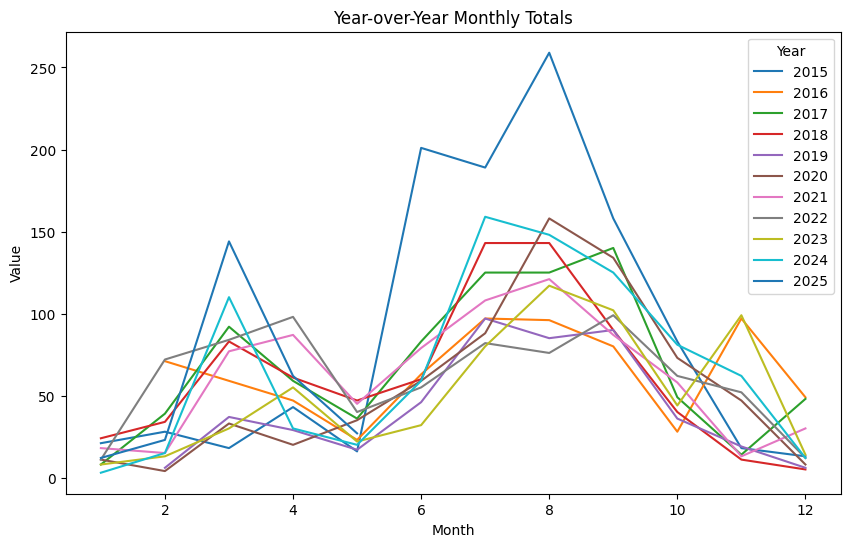

In [170]:
monthly.plot(figsize=(10, 6))
plt.title('Year-over-Year Monthly Totals')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend(title='Year')
plt.show()

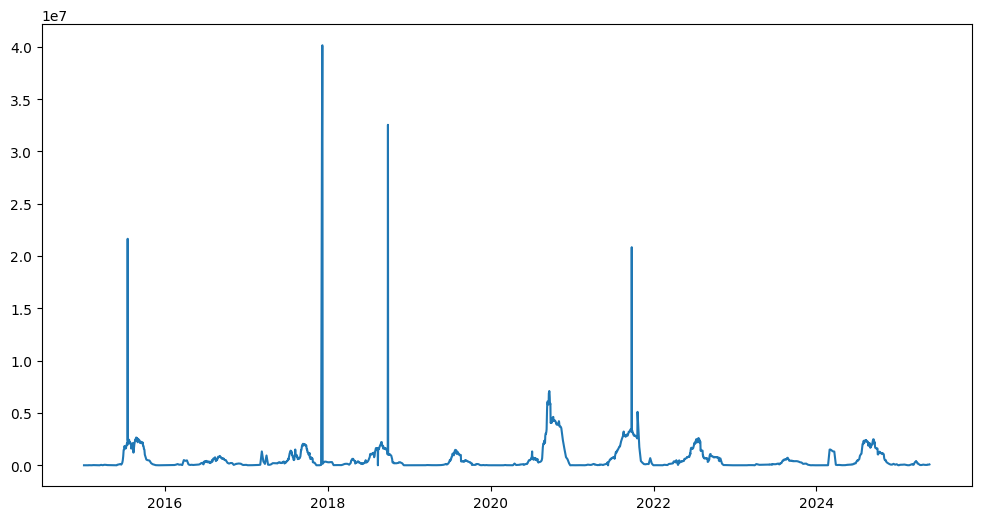

In [178]:
plt.figure(figsize=(12, 6))
plt.plot(day_sum.index,day_sum['cumulative_acres'])

In [154]:
day_sum.sort_values('cumulative_acres')[:]


,Unnamed: 0,gacc,fires,cumulative_acres,crews,engines,helicopters,total_personnel
date,,,,,,,,
2021-06-11,172615,AKCCCCNWCCCCONCCOSCCNRCCCCGBCCCCSWCCRMCCCCEACC...,0.0,0.0,0.0,0.0,0.0,0.0
2023-12-29,116645,AKCCCCNWCCCCONCCOSCCNRCCCCGBCCCCSWCCRMCCCCEACC...,0.0,0.0,0.0,0.0,0.0,0.0
2023-02-03,124025,AKCCCCNWCCCCONCCOSCCNRCCCCGBCCCCSWCCRMCCCCEACC...,1.0,0.0,0.0,5.0,0.0,10.0
2023-01-27,88245,AKCCCCNWCCCCONCCOSCCNRCCCCGBCCCCSWCCRMCCCCEACC...,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-05,142615,AKCCCCNWCCCCONCCOSCCNRCCCCGBCCCCSWCCRMCCCCEACC...,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2021-09-25,44045,AKCCCCNWCCCCONCCOSCCNRCCCCGBCCCCSWCCRMCCCCEACC...,63.0,20846361.0,357.0,984.0,153.0,17449.0
2015-07-17,90145,AKCCCCNWCCCCONCCOSCCNRCCCCGBCCCCSWCCRMCCCCEACC...,129.0,21651712.0,138.0,156.0,60.0,4953.0
2018-09-27,104845,AKCCCCNWCCCCONCCOSCCNRCCCCGBCCCCSWCCRMCCCCEACC...,41.0,32547418.0,165.0,379.0,71.0,7586.0


In [144]:
day_sum[day_sum['cumulative_acres']==day_sum['cumulative_acres'].max()]

,Unnamed: 0,gacc,fires,cumulative_acres,crews,engines,helicopters,total_personnel
date,,,,,,,,
2017-12-07,193315,AKCCCCNWCCCCONCCOSCCNRCCCCGBCCCCSWCCRMCCCCEACC...,22.0,40151429.6,117.0,731.0,6.0,5408.0


In [157]:
df[df['date']=='2015-07-17']

,Unnamed: 0,date,gacc,fires,cumulative_acres,crews,engines,helicopters,total_personnel
9010,9010,2015-07-17,AKCC,55,"2,144,3200",72,16,25,"2,097"
9011,9011,2015-07-17,NWCC,20,"74,494",29,79,18,"1,535"
9012,9012,2015-07-17,ONCC,0,0,0,0,0,0
9013,9013,2015-07-17,OSCC,3,"31,668",14,8,3,376
9014,9014,2015-07-17,NRCC,11,"13,371",17,26,6,598
9015,9015,2015-07-17,GBCC,14,"21,575",3,17,4,180
9016,9016,2015-07-17,SWCC,5,"42,975",3,3,0,94
9017,9017,2015-07-17,RMCC,4,2,0,0,0,15
9018,9018,2015-07-17,EACC,0,0,0,0,0,0
9019,9019,2015-07-17,SACC,17,"24,427",0,7,4,58


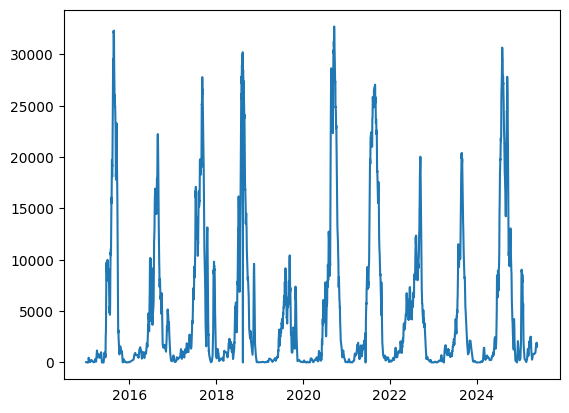

In [131]:
plt.plot(day_sum.index,day_sum['total_personnel'])

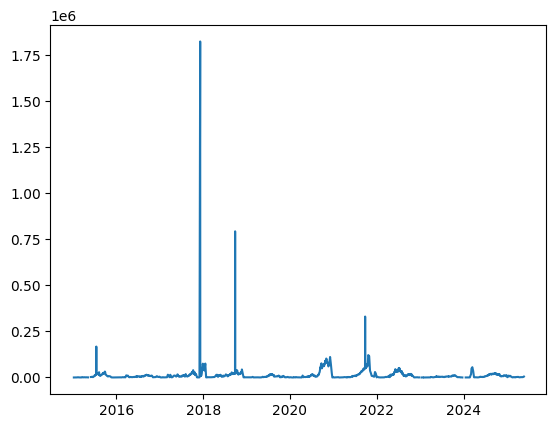

In [132]:
plt.plot(day_sum.index,day_sum['cumulative_acres']/day_sum['fires'])

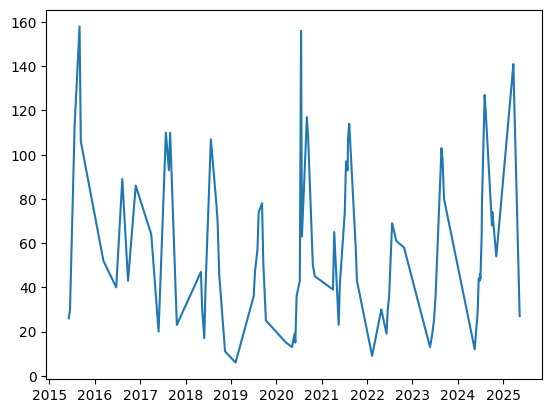

In [88]:
plt.plot(day_sum.index,day_sum['fires'])

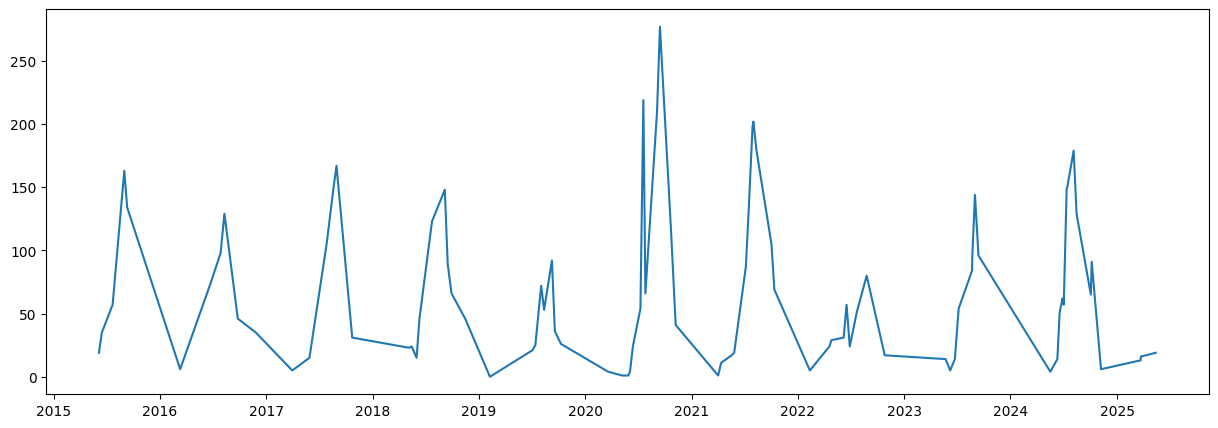

In [89]:
plt.figure(figsize=(15,5))
plt.plot(day_sum.index,day_sum['helicopters'])
